# ADMN5015 - FINAL ARTIFICIAL INTELLIGENCE  PROJECT  

# Music Recommendation System 

#### In this project I have used a dataset containing 195 songs. It is mainly French Rap , American rap , rock or electro music, classical songs and disco songs, which I collected from Kaggle.com. Here, I am trying to create a music recommender system where the music provider can predict and then offer the appropriate songs to their users based on the characterstics of the music that has been previously heard or according to the like and dislikes of music. Then I save the classification report as a database in which the classification report shows a representation of the main classification metrics on a per-class basis. This gives a deeper intuition of the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem. Later on I visualize the classification report using powerbi. If a new company adapts this system, then the company will be able to provide best possible experience for the users, a good user experience will eventually lead to more sales and more profit. 

In [88]:
# importing os to interact with the underlying operating system

import os

In [89]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#import warnings filter

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline 

### Importing the dataset

In [90]:
# importing the dataset

MUSIC_df = pd.read_csv("DATA_MUSIC.CSV")

In [91]:
#initial columns and rows of the dataset

MUSIC_df.head()

,songs,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,1,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,2,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,3,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,4,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,5,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [92]:
#final columns and rows of the dataset

MUSIC_df.tail()

,songs,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
190,191,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.143,176.616,206520,3,0
191,192,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.882,124.896,254240,4,0
192,193,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.616,90.664,235947,4,0
193,194,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.413,110.547,190239,5,1
194,195,0.747,0.6660,11,-7.845,1,0.1970,0.1300,0.000000,0.3600,0.531,77.507,177213,4,1


In [93]:
# cheching the variable type

MUSIC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   songs             195 non-null    int64  
 1   danceability      195 non-null    float64
 2   energy            195 non-null    float64
 3   key               195 non-null    int64  
 4   loudness          195 non-null    float64
 5   mode              195 non-null    int64  
 6   speechiness       195 non-null    float64
 7   acousticness      195 non-null    float64
 8   instrumentalness  195 non-null    float64
 9   liveness          195 non-null    float64
 10  valence           195 non-null    float64
 11  tempo             195 non-null    float64
 12  duration_ms       195 non-null    int64  
 13  time_signature    195 non-null    int64  
 14  liked             195 non-null    int64  
dtypes: float64(9), int64(6)
memory usage: 23.0 KB


In [94]:
# description of the data in the DataFrame

MUSIC_df.describe()

,songs,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.000000,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,56.435804,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,1.000000,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,49.500000,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,98.000000,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,146.500000,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,195.000000,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


In [95]:
# total number of musics and variables

MUSIC_df.shape

(195, 15)

In [96]:
#returns the number of missing values in the data set.

MUSIC_df.isnull().sum()

songs               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [97]:
# number of liked and disliked songs

MUSIC_df['liked'].value_counts()

1    100
0     95
Name: liked, dtype: int64

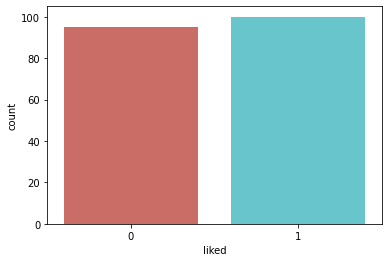

In [98]:
# visualizing the above result

sns.countplot(x='liked', data= MUSIC_df, palette='hls')
plt.show()


# Data Pre-Processing
## Creating Train & Test sets

In [99]:
#creating training and testing sets
#removing liked values from MUSIC_df and storing the result to x
# assigning the liked values in the dataframe to y

X = MUSIC_df.drop('liked' , axis = 1)
y = MUSIC_df['liked']

In [100]:
# from sklearn.model_selection we are importing train_test_split for splitting data into training and testing data.
# from sklearn.metrics we are importing accuracy_score , roc_auc_score , confusion_matrix 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , roc_auc_score , confusion_matrix

In [101]:
# splitting the data 
# assigning the size of the data, size of testing set = 30% of total data  

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3)

In [102]:
# training set contains 136 songs and testing set contains 59 songs

print("the shapes of x-train and x-test are : " , X_train.shape , X_test.shape)
print("the shapes of y-train and y-test are : " , y_train.shape , y_test.shape)

the shapes of x-train and x-test are :  (136, 14) (59, 14)
the shapes of y-train and y-test are :  (136,) (59,)


Text(0.5, 1.0, 'Correlation HeatMap')

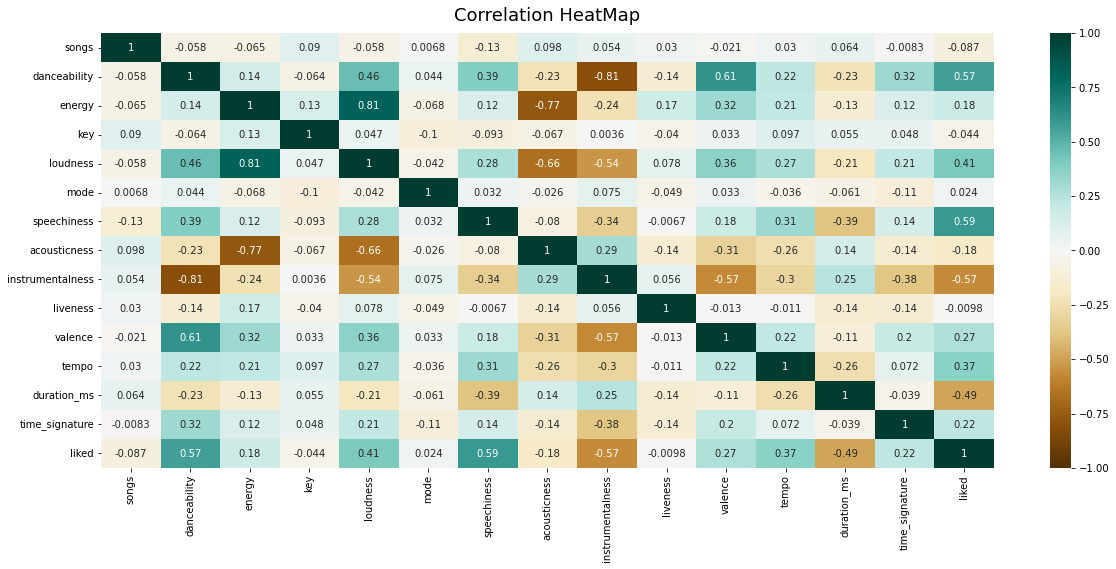

In [103]:
# correlation heatmap

plt.figure(figsize=(20,8))
heatmap = sns.heatmap(MUSIC_df.corr() , vmin=-1 , vmax=1 ,annot=True , cmap='BrBG')
heatmap.set_title('Correlation HeatMap' , fontdict = {'fontsize' : 18} , pad=12)

# Building ML Models
## Decision Tree Classifier

In [104]:
# importing DecisionTreeClassifier
# creates the classification model by building a decision tree.

from sklearn.tree import DecisionTreeClassifier , plot_tree

In [105]:
dt_clf = DecisionTreeClassifier()

In [106]:
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier()

In [107]:
y_preds_dt = dt_clf.predict(X_test)

In [108]:
print("Accuracy Score of the Decision Tree Model" , accuracy_score(y_test , y_preds_dt))
print("ROC AUC score of the Decision Tree Model is : " , roc_auc_score(y_test , y_preds_dt))

Accuracy Score of the Decision Tree Model 0.8305084745762712
ROC AUC score of the Decision Tree Model is :  0.8304597701149427


#### Here, the Accuracy Score of the Decision Tree Model =  0.813

Text(0.5, 1.0, 'Confusin Matrix Of Decision Tree Model')

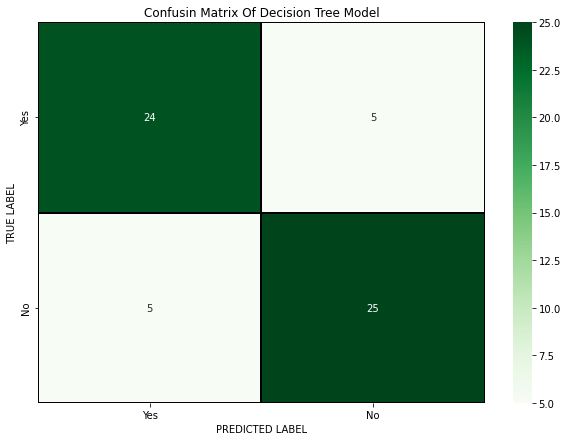

In [109]:
#confusion Matrix of Decision Tree Model 
cm  = confusion_matrix(y_test , y_preds_dt)

x_axis_labels = ["Yes" , "No"]
y_axis_labels = ["Yes" , "No"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm , annot=True, linewidths=0.2 , linecolor="black" , fmt=".0f" , ax=ax , cmap="Greens" , 
           xticklabels=x_axis_labels , yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusin Matrix Of Decision Tree Model")

# Ensemble Models
## Random Forest Classifier

In [110]:
# importing RandomForestClassifier , ExtraTreesClassifier , BaggingClassifier , AdaBoostClassifier from sklearn.ensemble

# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

# An extra-trees classifier implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

# A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

# AdaBoostClassifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier , BaggingClassifier , AdaBoostClassifier

In [111]:
rf_clf = RandomForestClassifier(n_estimators=100)
extratree_clf = ExtraTreesClassifier(n_estimators=100)
bg_clf = BaggingClassifier(n_estimators=100)
ada_clf = AdaBoostClassifier(n_estimators=100)

In [112]:
rf_clf.fit(X_train , y_train)
extratree_clf.fit(X_train , y_train)
bg_clf.fit(X_train , y_train)
ada_clf.fit(X_train , y_train)

AdaBoostClassifier(n_estimators=100)

In [113]:
y_preds_rf = rf_clf.predict(X_test)
y_preds_et = extratree_clf.predict(X_test)
y_preds_bg = bg_clf.predict(X_test)
y_preds_ada = ada_clf.predict(X_test)

In [114]:
print("Accuracy Score of the Random Forest Model", accuracy_score(y_test, y_preds_rf))
print("Accuracy Score of the Extre Tree Classifier Model", accuracy_score(y_test, y_preds_et))
print("Accuracy Score of the Bagging Classifier Model", accuracy_score(y_test, y_preds_bg))
print("Accuracy Score of the AdaBoost Classifier Model", accuracy_score(y_test, y_preds_ada))

Accuracy Score of the Random Forest Model 0.9322033898305084
Accuracy Score of the Extre Tree Classifier Model 0.9152542372881356
Accuracy Score of the Bagging Classifier Model 0.8983050847457628
Accuracy Score of the AdaBoost Classifier Model 0.9322033898305084


In [115]:
print("ROC AUC Score of the Random Forest Model", roc_auc_score(y_test, y_preds_rf))
print("ROC AUC Score of the Extre Tree Classifier Model", roc_auc_score(y_test, y_preds_et))
print("ROC AUC Score of the Bagging Classifier Model", roc_auc_score(y_test, y_preds_bg))
print("ROC AUC Score of the AdaBoost Classifier Model", roc_auc_score(y_test, y_preds_ada))

ROC AUC Score of the Random Forest Model 0.9321839080459771
ROC AUC Score of the Extre Tree Classifier Model 0.9149425287356322
ROC AUC Score of the Bagging Classifier Model 0.8982758620689655
ROC AUC Score of the AdaBoost Classifier Model 0.9316091954022989


#### Here we can see that,  Accuracy Score of the Random Forest Model = 0.93
#### Accuracy Score of the Extre Tree Classifier Model = 0.88
#### Accuracy Score of the Bagging Classifier Model= 0.91
#### Accuracy Score of the AdaBoost Classifier Model= 0.88


## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier Model')

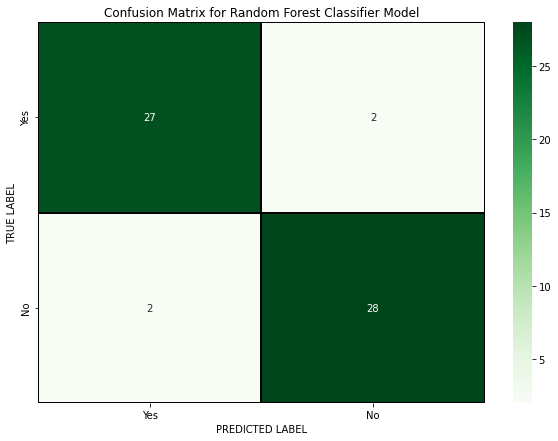

In [116]:
#Confusion Matrix of Random Forest Classifier Model.
cm = confusion_matrix(y_test, y_preds_rf)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for Extra Tree Classifier Model')

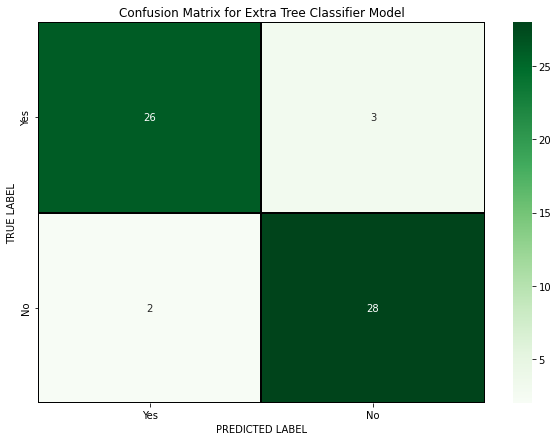

In [117]:
#Confusion Matrix of Extra Tree Classifier Model.
cm = confusion_matrix(y_test, y_preds_et)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Extra Tree Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for Bagging Classifier Model')

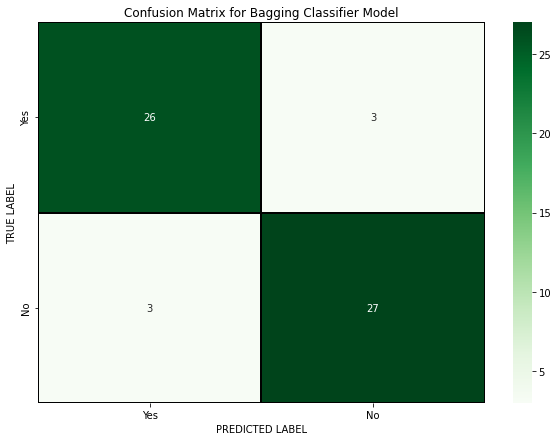

In [118]:
#Confusion Matrix of Bagging Classifier Model.
cm = confusion_matrix(y_test, y_preds_bg)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for AdaBoost Classifier Model')

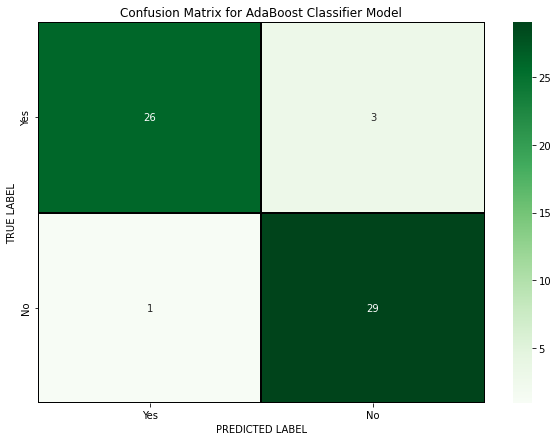

In [119]:
#Confusion Matrix of AdaBoost Classifier Model.
cm = confusion_matrix(y_test, y_preds_ada)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoost Classifier Model')

## LGBM Classifier

In [127]:
# importing LGBMClassifier from lightgbm

# Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm

from lightgbm import LGBMClassifier

In [128]:
lgbm_clf = LGBMClassifier()

In [129]:
lgbm_clf.fit(X_train , y_train)

LGBMClassifier()

In [130]:
y_preds_lgbm = lgbm_clf.predict(X_test)

In [131]:
print("Accuracy Score of the LGBM Model", accuracy_score(y_test, y_preds_lgbm))
print("ROC AUC Score of the LGBM Model", roc_auc_score(y_test, y_preds_lgbm))

Accuracy Score of the LGBM Model 0.9152542372881356
ROC AUC Score of the LGBM Model 0.9149425287356322


#### Here the accuracy of LGBM Model is 0.89

Text(0.5, 1.0, 'Confusion Matrix for LGBM Classifier Model')

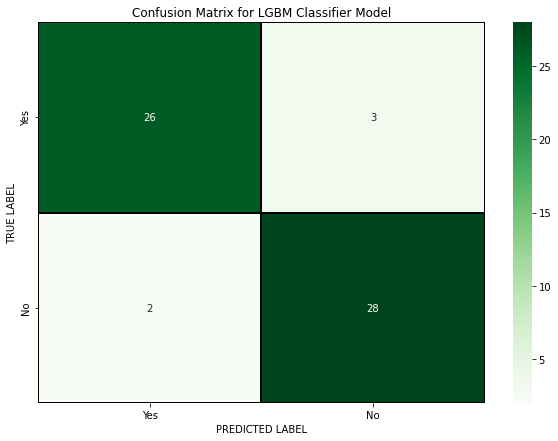

In [132]:
#Confusion Matrix of LGBM Classifier Model.
cm = confusion_matrix(y_test, y_preds_lgbm)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LGBM Classifier Model')

In [133]:
pip install logmodel

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\nidiy\anaconda3\python.exe -m pip install --upgrade pip' command.


## Predictions and Evaluations 

In [134]:
# importing classification_report from sklearn.metrics

from sklearn.metrics import classification_report

In [135]:
# classification report based on LGBMClassifier result 

print("Model Classification Report:")

print(classification_report(y_test,y_preds_lgbm))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.90      0.93      0.92        30

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.92        59
weighted avg       0.92      0.92      0.92        59



In [136]:
# classification report based on AdaBoost Classifier result

print("Model Classification Report:")

print(classification_report(y_test,y_preds_ada))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.91      0.97      0.94        30

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



In [137]:
# classification report based on Bagging Classifier result

print("Model Classification Report:")

print(classification_report(y_test,y_preds_bg))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.90      0.90      0.90        30

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59



In [138]:
# classification report based on Extra Tree Classifier result

print("Model Classification Report:")

print(classification_report(y_test,y_preds_et))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.90      0.93      0.92        30

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.92        59
weighted avg       0.92      0.92      0.92        59



In [139]:
# classification report based on Random Forest Classifier result

print("Model Classification Report:")

print(classification_report(y_test,y_preds_rf))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.93      0.93      0.93        30

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



In [140]:
# classification report based on Decision Tree Classifier result

print("Model Classification Report:")

print(classification_report(y_test,y_preds_dt))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.83      0.83      0.83        30

    accuracy                           0.83        59
   macro avg       0.83      0.83      0.83        59
weighted avg       0.83      0.83      0.83        59



#### Here, Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. 

#### Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances.

#### The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 

#### Support is the number of actual occurrences of the class in the specified dataset.

#### From the above Classification Reports it is clear that the results of Random Forest Classifier is more accurate when compared to other classifier, with Accuracy = 0.93, where number of disliked songs = 29 and liked songs = 30, within a total of 59 songs in the testing set. 


## PREDICTED VALUES - RANDOM FOREST CLASSIFIER 

In [147]:
# importing necessary packages
import sqlite3
import json
import codecs

In [141]:
conn = sqlite3.connect('music_predict.db')

In [148]:
prediction = print(y_test,y_preds_rf)

62     0
20     1
39     1
150    1
19     1
116    0
105    0
184    0
35     0
96     1
169    1
178    1
92     0
32     0
164    0
24     0
115    0
187    1
100    0
118    1
59     0
131    0
135    0
82     1
141    1
25     1
119    1
120    1
125    1
43     1
90     1
122    1
23     1
112    1
159    0
16     1
17     0
192    0
134    1
75     0
73     0
190    0
42     1
30     1
113    0
173    1
13     1
126    0
138    0
6      1
77     1
74     0
102    1
48     0
176    0
175    0
174    0
149    1
117    0
Name: liked, dtype: int64 [0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0]


In [ ]:
# saving as a database

# Main
def main():


         finalprediction  = prediction + ".json"
        
         with open(finalprediction, 'w', encoding='utf-8') as outfile:
            json.dump(data, outfile, indent=4)

files = []

for file in files:
         with codecs.open(file,'r','utf-8') as f: 
              data = json.load(f)
              print(f.name)

            
c = conn.cursor()
              
c.execute('''CREATE TABLE randomforestprediction(songs INT, likes INT )''')
                
c.execute('''INSERT INTO randomforestprediction VALUES (?, ?)''', ( songs, likes))
 
 conn.commit()

if __name__ == "__main__":
    main()